In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [12]:
def make_psd_self(data_in,fsamp,res):
    data_det=signal.detrend(data_in)
    res = res
    fsamp = fsamp # stays hard coded for now
    freqs=np.linspace(0,int(fsamp/2),(int(res/2))+1)    # change
    xFFT=np.fft.rfft(data_det)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    xphase=np.angle(xFFT)
    return freqs,xpsd,xphase

def psds_from_sum_over_BDFs(folder,filePreFix,noFiles,excludeList=[],fsamp=5000,res=50000,factor=10,includeSpin=True):
    folder=folder

    data_x =  data_z = data_s =0
    data_x_sum = data_z_sum = data_s_sum = 0

    for i in tqdm(range(noFiles)):
        file = folder +  "%s_%d.h5" %(filePreFix,i)
        BDF=BeadDataFile.BeadDataFile(file)
        data_x=BDF.x2
        data_z=BDF.z2
        if(includeSpin==True):data_s=BDF.spin_data[0]
        if(i not in excludeList):
            data_x_sum+=data_x
            data_z_sum+=data_z
            if(includeSpin==True):data_s_sum+=data_s

    
        else:print("File was %d was excluded" %i)
        
    fsamp=fsamp
    res=res
    fs=s=sp=0
    f ,x,xp = make_psd_self(data_in=data_x_sum,fsamp=fsamp,res=res)  
    f ,z,zp = make_psd_self(data_in=data_z_sum,fsamp=fsamp,res=res)  
    if(includeSpin==True):fs ,s,sp = make_psd_self(data_in=data_s_sum,fsamp=fsamp*factor,res=res*factor)  
    
    return f,fs,x,z,s,xp,zp,sp

In [ ]:
stdTest=[]

for i in tqdm(range(5000)):
    folder="/data/new_trap/20210423/Bead3/Shaking/NoAttractorShaking5"
    BDF_b=BeadDataFile.BeadDataFile(folder+"/NoAttractorShaking6_%d.h5" %i)
    stdTest.append(np.std(BDF_b.x2))
    #plt.plot(BDF_b.x2)
    #plt.ylabel("x2 [a.u]")
    #plt.xlabel("time [samples]")


In [ ]:
plt.plot(stdTest)
for element in stdTest:
    if(element > (np.mean(stdTest)*3)):
        print(stdTest.index(element))

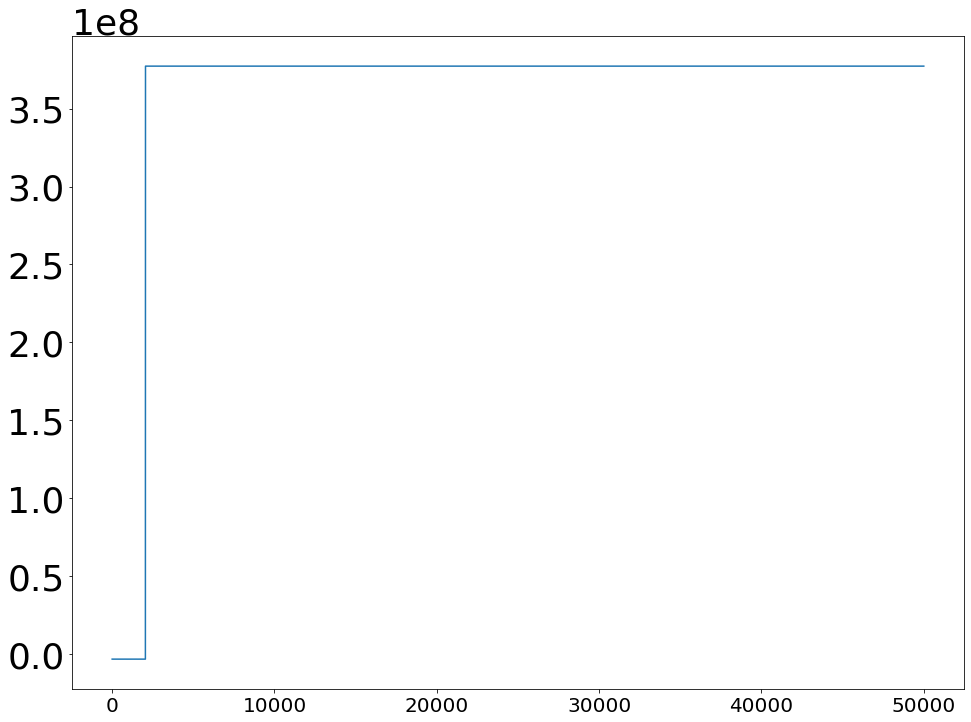

In [3]:
i=624
folder="/data/new_trap/20210503/Bead2/Shaking/NoAttractorShaking0/"
BDF_b=BeadDataFile.BeadDataFile(folder+"/NoAttractorNoShaking0_%d.h5" %i)
#plt.plot(BDF_b.y2)
plt.plot(BDF_b.z2)


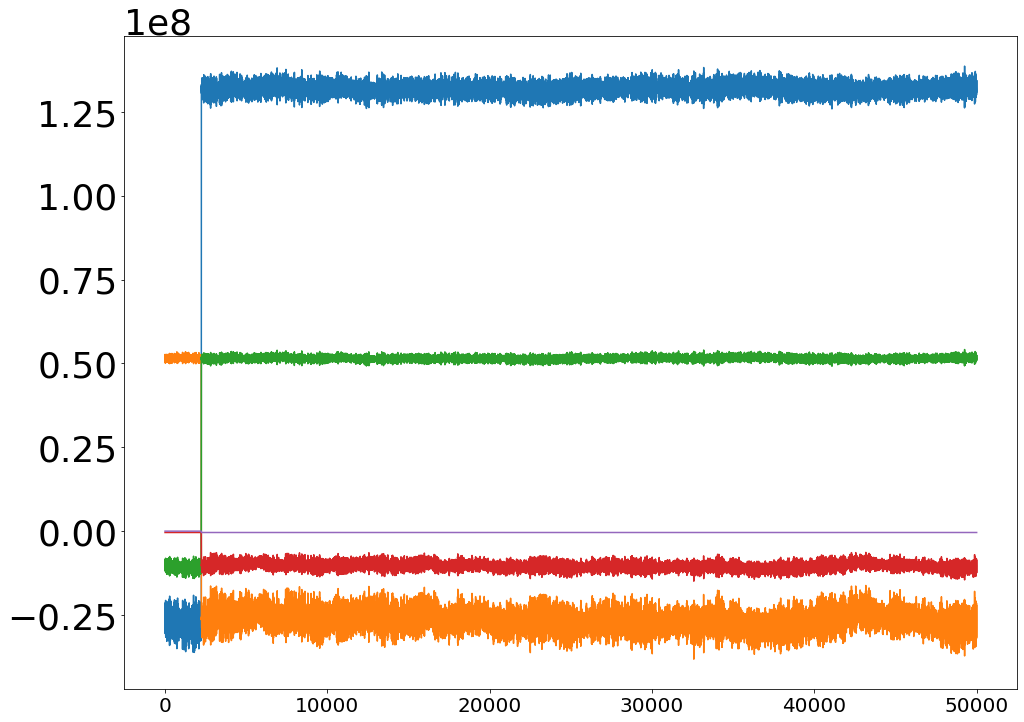

In [11]:
i=624
folder="/data/new_trap/20210503/Bead2/Shaking/NoAttractorShaking0/"
fname=folder+"/NoAttractorNoShaking0_%d.h5" %i
f = h5py.File(fname,'r')
pos_data = np.array(f['pos_data'])
quad_data = np.array(f['quad_data']) 
amp = quad_data.reshape(-1,12).T[:5]
phase = quad_data.reshape(-1,12).T[5:10]
#plt.plot(amp[1])
#plt.plot(amp[2])
#plt.plot(amp[3])
#plt.plot(amp[4])
#plt.plot(pos_data.reshape(-1,11).T[0])
plt.plot(pos_data.reshape(-1,11).T[1])
plt.plot(pos_data.reshape(-1,11).T[2])
plt.plot(pos_data.reshape(-1,11).T[3])
plt.plot(pos_data.reshape(-1,11).T[4])
plt.plot(pos_data.reshape(-1,11).T[5])


In [ ]:
folder="/data/new_trap/20210503/Bead2/Shaking/NoAttractorShaking0/"
filePreFix="/NoAttractorNoShaking0"
excludeList=[624]
noFiles=1000
f,fs,xb,zb,sb,xbp,zbp,sbp= psds_from_sum_over_BDFs(folder,filePreFix,noFiles,excludeList=excludeList)

In [ ]:
folder="/data/new_trap/20210503/Bead2/Shaking/NoAttractorShaking0/"
filePreFix="/NoAttractorShaking0"
excludeList=[683,684,709,723,745,754,768,771,3778]
noFiles=1000
f,fs,xs,zs,ss,xsp,zsp,ssp= psds_from_sum_over_BDFs(folder,filePreFix,noFiles,excludeList=excludeList)

In [ ]:
folder="/data/new_trap/20210423/Bead3/Shaking/NoAttractorShaking5"
filePreFix="/NoAttractorShaking6"
excludeList=[2213]
noFiles=1000
f,fs,xs2,zs2,ss2,xsp2,zsp2,ssp2= psds_from_sum_over_BDFs(folder,filePreFix,noFiles,excludeList=excludeList)

In [ ]:
folder="/data/new_trap/20200320/Bead1/Shaking/Shaking378/"
filePreFix="Shaking3"
#excludeList=[683,684,709,723,745,754,768,771]
noFiles=1000
f,fs,xs3,zs3,ss3,xsp3,zsp3,ssp3= psds_from_sum_over_BDFs(folder,filePreFix,noFiles,excludeList=excludeList,includeSpin=False)

In [ ]:
plt.plot(f,xb, '.-', label="no shaking (1000 files)",markersize=1,linewidth=2.5,color="orange")
#plt.plot(f,xb2, '.-', label="bug removed (1000 files)",markersize=1,linewidth=2.5,color="orange")

plt.plot(f,xs, '.-', label="shaking 3Hz with cover (1000 files)",markersize=1,linewidth=2.5,color="purple",alpha=0.5)#
plt.plot(f,xs2, '.-', label="shaking 3Hz without cover (1000 files)",markersize=1,linewidth=2.5,color="green",alpha=1)#
#plt.plot(f,zs3, '.-', label="shaking 3Hz wilson (1000 files)",markersize=1,linewidth=2.5,color="red",alpha=0.5)#


for i in np.arange(3,50,3):
    plt.axvline(i,linestyle="dashed",alpha=0.5)
#for i in np.arange(13,260,13):
#    plt.axvline(i,linestyle="dashed",alpha=0.5)
#plt.axvline(51,linestyle="dashed",alpha=0.5,color="blue",label="harmonics of 3 hz")
plt.ylim(1e-11,1)
plt.xlim(1,60)
plt.yscale("log")
#plt.xscale("log")
plt.legend()
plt.ylabel("spin PSD [a.u.]")
plt.xlabel("frequency [Hz]")
plt.show()

In [ ]:
plt.plot(f,zb, '.-', label="no shaking (1000 files)",markersize=1,linewidth=2.5,color="orange")
#plt.plot(f,xb2, '.-', label="bug removed (1000 files)",markersize=1,linewidth=2.5,color="orange")

plt.plot(f,zs, '.-', label="shaking 3Hz with cover (1000 files)",markersize=1,linewidth=2.5,color="purple",alpha=0.5)#
plt.plot(f,zs2, '.-', label="shaking 3Hz without cover (1000 files)",markersize=1,linewidth=2.5,color="green",alpha=1)#
plt.plot(f,zs3, '.-', label="shaking 3Hz wilson (1000 files)",markersize=1,linewidth=2.5,color="red",alpha=0.5)#


for i in np.arange(3,50,3):
    plt.axvline(i,linestyle="dashed",alpha=0.5)
#for i in np.arange(13,260,13):
#    plt.axvline(i,linestyle="dashed",alpha=0.5)
#plt.axvline(51,linestyle="dashed",alpha=0.5,color="blue",label="harmonics of 3 hz")
plt.ylim(1,1e9)
plt.xlim(1,60)
plt.yscale("log")
#plt.xscale("log")
plt.legend()
plt.ylabel("spin PSD [a.u.]")
plt.xlabel("frequency [Hz]")
plt.show()

In [ ]:
x=np.arange(0,25000.1,0.1)
plt.plot(x,sb, '.-', label="no shaking (1000 files)",markersize=1,linewidth=2.5,color="orange")
#plt.plot(f,xb2, '.-', label="bug removed (1000 files)",markersize=1,linewidth=2.5,color="orange")

plt.plot(x,ss, '.-', label="shaking 3Hz with cover (1000 files)",markersize=1,linewidth=2.5,color="purple",alpha=0.5)#
plt.plot(x,ss2, '.-', label="shaking 3Hz without cover (1000 files)",markersize=1,linewidth=2.5,color="green",alpha=1)#


for i in np.arange(3,50,3):
    plt.axvline(i,linestyle="dashed",alpha=0.5)
#for i in np.arange(13,260,13):
#    plt.axvline(i,linestyle="dashed",alpha=0.5)
#plt.axvline(51,linestyle="dashed",alpha=0.5,color="blue",label="harmonics of 3 hz")
plt.ylim(1e-12,1e-1)
plt.xlim(1,60)
plt.yscale("log")
#plt.xscale("log")
plt.legend()
plt.ylabel("spin PSD [a.u.]")
plt.xlabel("frequency [Hz]")
plt.show()